In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
NEURAL_NETWORKS = ['GradientBoosting', 'KNN', 'NBayes', "RandomForest", 'DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
pre_name = "ml_dl"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [3]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [4]:
def makedatFile(network, attribute, x, y):
  f = open(results_path / 'analitycs' / 'by_train' / '_pre_plot' / 'dats' /f"{network}_{attribute}.dat", "w+")
  f.write("x F(x)\n")
  for i, axisx in enumerate(x):
     f.write(f"{axisx} {y[i]}\n")

In [5]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,GradientBoosting,22.591440,22.668389,45.259830,87.365291,87.463312,86.916519,87.787570,85.609942,...,71.328626,78.774081,60.160443,89.942263,42.739448,44.055251,37.064478,48.961127,19.219506,66.806099
1,10,GradientBoosting,19.113613,19.195020,38.308632,91.279755,91.303445,90.780683,91.724349,89.365184,...,76.070849,83.172732,65.418024,93.825557,48.144815,49.813787,45.223582,53.605414,32.650834,66.178162
2,15,GradientBoosting,18.142051,18.229135,36.371186,93.114107,93.109174,92.697461,93.341735,91.731050,...,75.413630,83.244673,63.667065,94.991239,48.766536,51.711591,45.496515,55.045650,31.172813,69.369353
3,20,GradientBoosting,19.213813,19.304596,38.518409,94.230609,94.229971,93.926744,94.473292,93.106923,...,76.109151,83.925498,64.384631,95.650019,49.761772,51.860671,47.329743,54.259868,36.934556,64.655055
4,25,GradientBoosting,20.199222,20.290877,40.490099,94.950677,94.942626,94.646912,95.233266,93.767380,...,76.028985,84.607711,63.160895,97.475801,49.219826,52.814428,45.816724,55.310109,31.576648,69.550185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,ResNet50,160.822083,3.720533,164.542617,94.208012,95.570540,93.392019,96.231437,89.132892,...,84.655996,95.796095,67.945847,112.506244,74.260442,89.670703,71.503009,91.550815,41.431300,121.622524
16,85,ResNet50,160.077265,3.695955,163.773221,94.077561,95.372868,93.592644,96.265227,89.583769,...,88.675974,95.834604,77.938030,106.572548,75.481290,88.585946,73.739615,91.585755,46.970405,118.354966
17,90,ResNet50,157.614939,3.636831,161.251770,94.106954,95.467934,92.934553,96.517862,87.559590,...,89.079115,95.999244,78.698921,106.379437,76.208812,89.498752,77.439253,92.017241,55.572271,113.884223
18,95,ResNet50,153.136700,3.561598,156.698299,94.309614,95.341691,93.582986,96.277566,89.541116,...,80.323865,95.728016,57.217637,118.834243,72.261662,86.834559,60.440390,91.416968,13.975522,137.881836


In [6]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

70.9852627232997

In [7]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [8]:
def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).

    obs:
    300+ dpi
    16px font
    export to pdf and plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_palette("husl", n_colors=len(NEURAL_NETWORKS))
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        #group by network_dat 
        print(network_data)
        ax.plot(x, y, label=network, marker='o', linestyle='-')
        print(network)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(attribute.replace('_', ' ').capitalize())
    ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        # set 10 ticks between min and max values
        # round to 2 decimal places
        min_value = main_pd[attribute].min()
        max_value = main_pd[attribute].max()
        step = (max_value - min_value) / 10
        ax.set_yticks(np.round(np.arange(min_value, max_value, step), 0))

        
        

    ax.legend( title='Models', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')
    plt.tight_layout()


    # make folder to save graphics
    if not os.path.exists(results_path / 'analitycs' / 'by_train' / 'graphics'):
        os.makedirs(results_path / 'analitycs' / 'by_train' / 'graphics')
    plt.savefig(results_path / 'analitycs' / 'by_train' / 'graphics' / f"{pre_name}_{attribute}.pdf", dpi=300)

    plt.show() 

    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

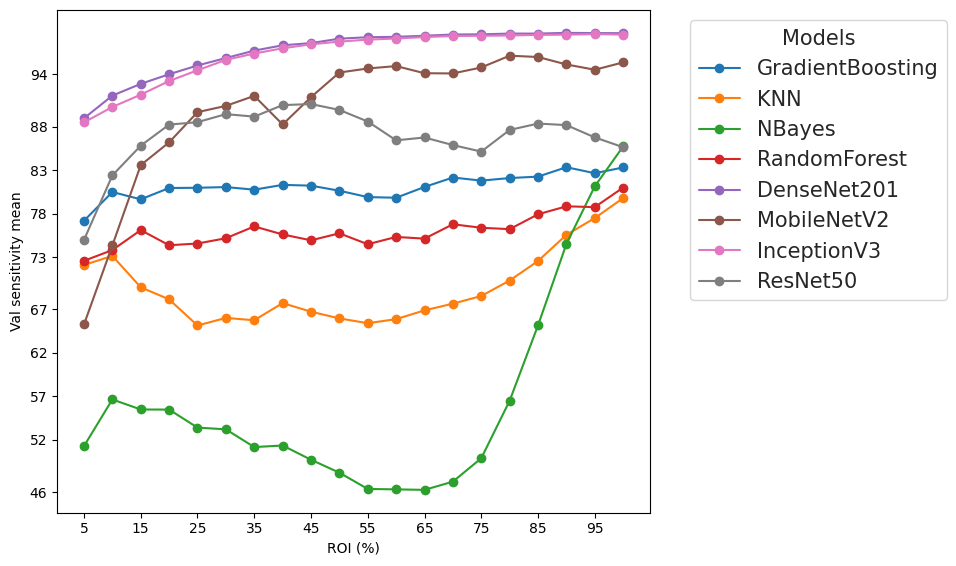

In [9]:
plot_comparison(main_pd, 'val_sensitivity_mean', '', 'ROI (%)', range_rois)

    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

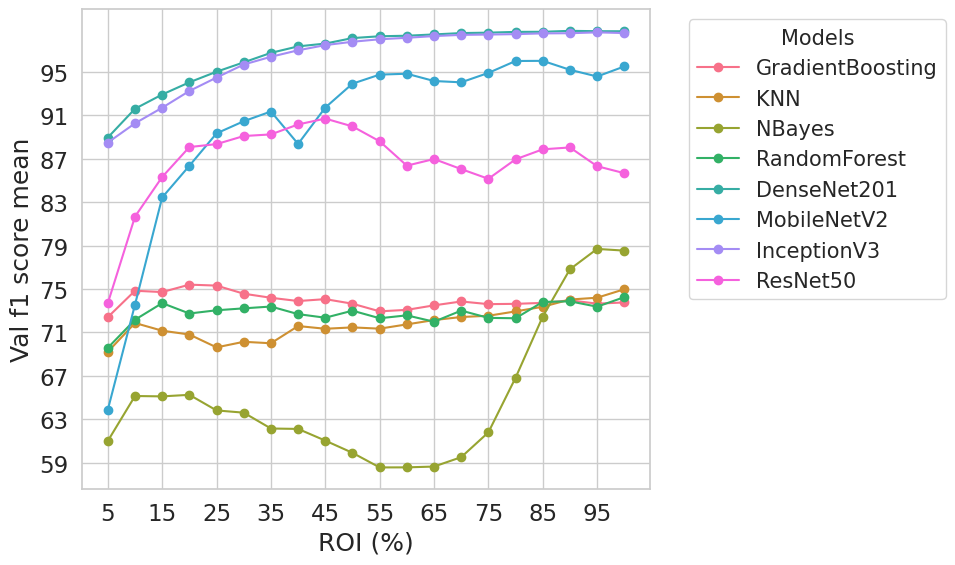

In [10]:
plot_comparison(main_pd, 'val_f1_score_mean', '', 'ROI (%)', range_rois)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

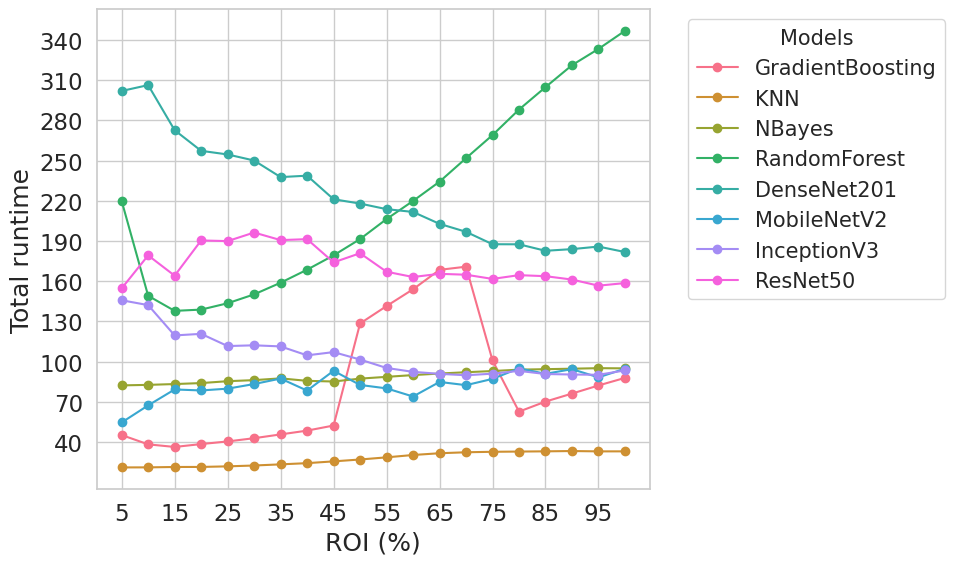

In [11]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', '', 'ROI (%)', range_rois, yticks=range_time)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

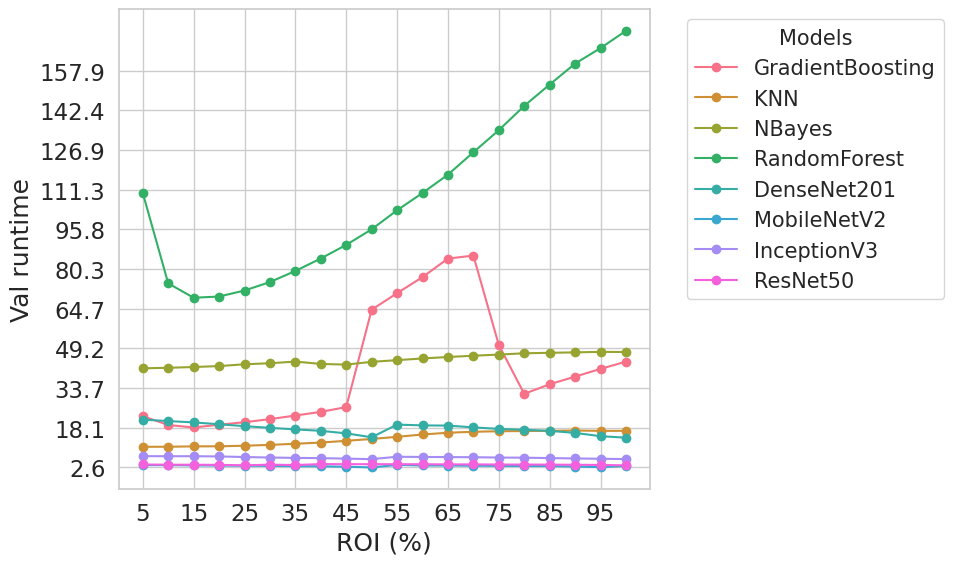

In [12]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação

# get min and max values for validation time
max_val_time = main_pd['val_runtime'].max()
min_val_time = main_pd['val_runtime'].min()
# de forma que fique sejam 11 valores
step = (max_val_time - min_val_time) / 11
range_time_validation = np.arange(min_val_time, max_val_time, step)

plot_comparison(main_pd, 'val_runtime', '', 'ROI (%)', range_rois, yticks=range_time_validation)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

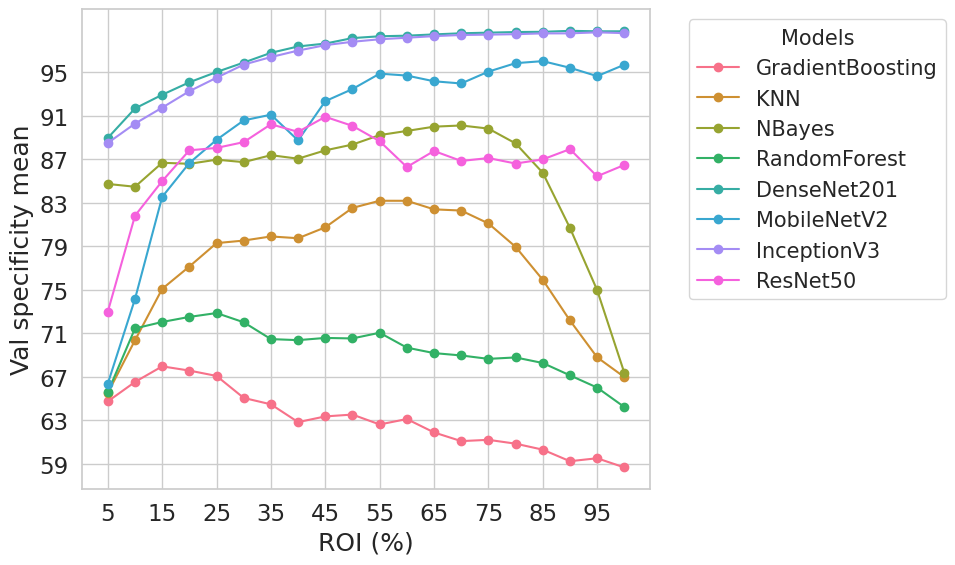

In [13]:

plot_comparison(main_pd, 'val_specificity_mean', '', 'ROI (%)', range_rois)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

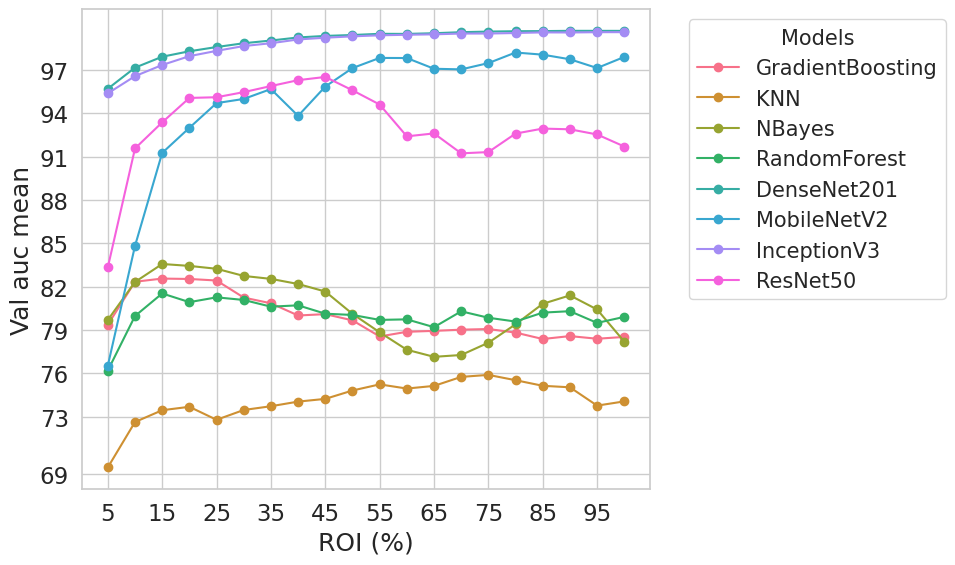

In [14]:
plot_comparison(main_pd, 'val_auc_mean', '', 'ROI (%)', range_rois)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

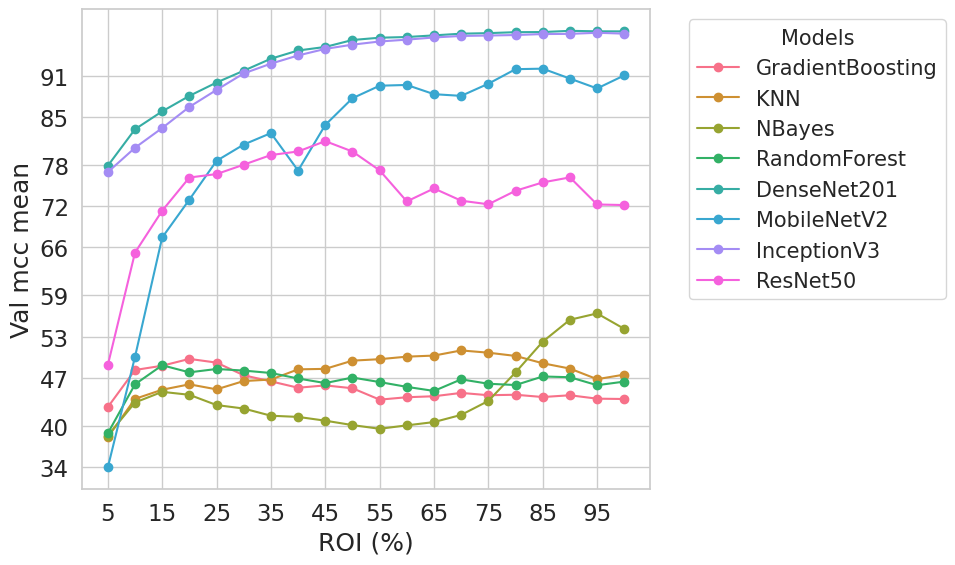

In [15]:
plot_comparison(main_pd, 'val_mcc_mean', '', 'ROI (%)', range_rois)


    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

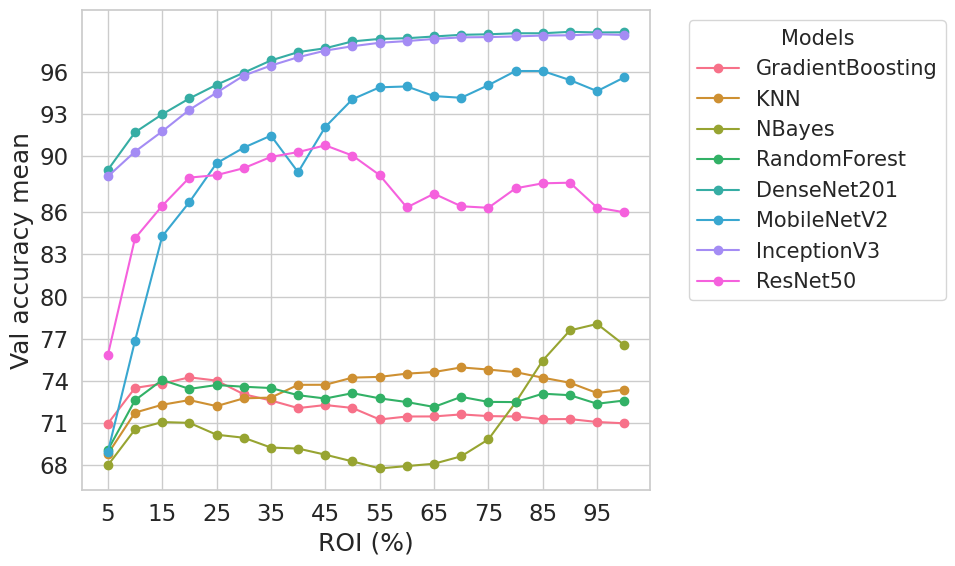

In [16]:
plot_comparison(main_pd, 'val_accuracy_mean', '', 'ROI (%)', range_rois)

    subset             model    runtime  val_runtime  total_runtime  \
0        5  GradientBoosting  22.591440    22.668389      45.259830   
1       10  GradientBoosting  19.113613    19.195020      38.308632   
2       15  GradientBoosting  18.142051    18.229135      36.371186   
3       20  GradientBoosting  19.213813    19.304596      38.518409   
4       25  GradientBoosting  20.199222    20.290877      40.490099   
5       30  GradientBoosting  21.403444    21.496869      42.900313   
6       35  GradientBoosting  22.814882    22.911214      45.726095   
7       40  GradientBoosting  24.228389    24.328095      48.556485   
8       45  GradientBoosting  26.127041    26.227201      52.354242   
9       50  GradientBoosting  64.176373    64.317633     128.494006   
10      55  GradientBoosting  70.667219    70.801137     141.468357   
11      60  GradientBoosting  76.937143    77.074856     154.011999   
12      65  GradientBoosting  84.180414    84.329244     168.509658   
13    

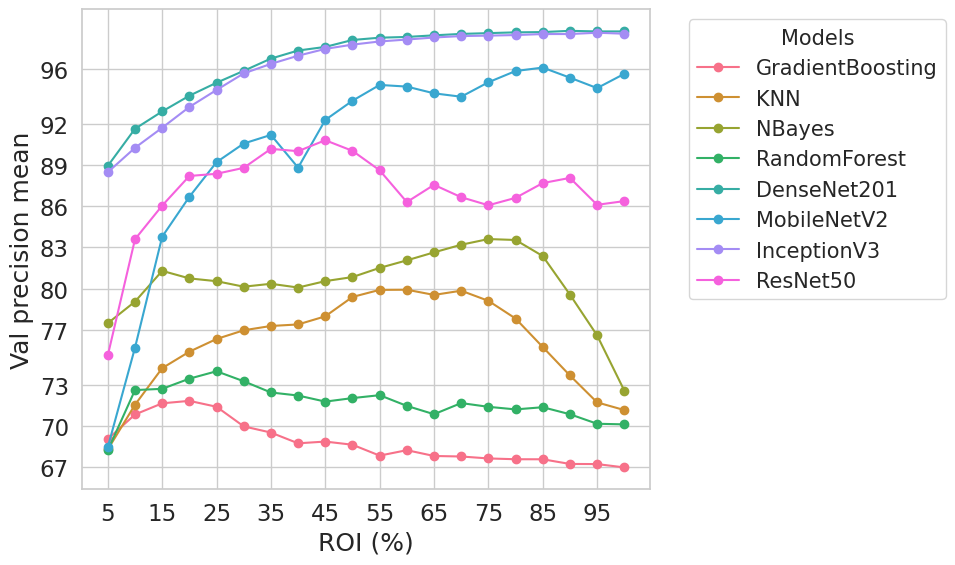

In [17]:
plot_comparison(main_pd, 'val_precision_mean', '', 'ROI (%)', range_rois)